In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
import matplotlib.colors as mcolors
palette = list(mcolors.TABLEAU_COLORS.keys())
%matplotlib inline

In [2]:
#sns.set_theme(style="ticks", palette="pastel")
sns.set_theme(style="ticks", palette="muted")
sns.set_context("talk")

In [3]:
#sns.color_palette(as_cmap=True)

In [4]:
df = pd.read_excel('plotting_data.xlsx')


In [5]:
df.head(3)

,Rescue,MPA (uM),Count,Size
0,Vehicle,0.0,1446000,5069
1,Vehicle,0.0,1480000,5281
2,100_Gua,0.0,734100,7704


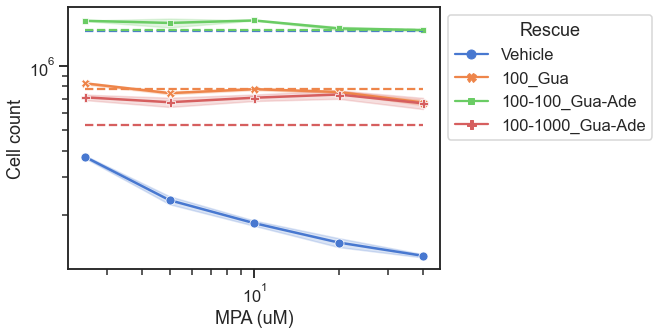

In [6]:
fig, ax1 = plt.subplots(1, 1, figsize=(9.5, 5))

mask = df['MPA (uM)'] > 0

g1 = sns.lineplot(ax=ax1, x="MPA (uM)", y="Count", hue="Rescue", style='Rescue', data=df[mask], linewidth=2.5, markers=True, dashes=False)

#g1.set_title('')
g1.set_ylabel('Cell count')
g1.set_xlabel('MPA (uM)')
g1.set_yscale("log")
g1.set_xscale("log")
sns.move_legend(g1, "upper left", bbox_to_anchor=(1, 1))

for mi, mc in enumerate(['Vehicle', '100_Gua', '100-100_Gua-Ade', '100-1000_Gua-Ade']):
    ml = g1.get_lines()[mi]
    mask_m = ~mask & (df['Rescue'] == mc)
    bsl = df.loc[mask_m, 'Count'].mean()

    g1.hlines(bsl, 2.5, 40, ls='--', color=ml.get_color())

fig.tight_layout()
fig.savefig('Cell_count.pdf', bbox_inches='tight')

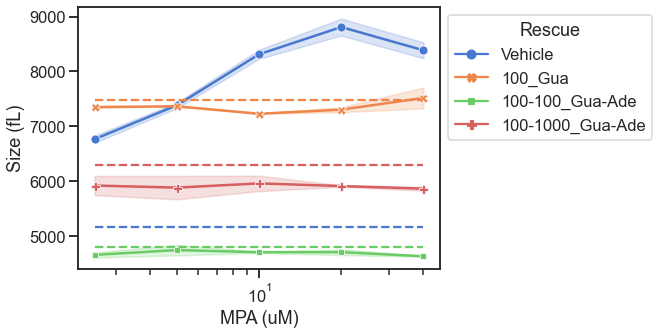

In [19]:
fig, ax1 = plt.subplots(1, 1, figsize=(9.5, 5))

mask = df['MPA (uM)'] > 0

g1 = sns.lineplot(ax=ax1, x="MPA (uM)", y="Size", hue="Rescue", style='Rescue', data=df[mask], linewidth=2.5, markers=True, dashes=False)

g1.set_ylabel('Size (fL)')
g1.set_xlabel('MPA (uM)')
g1.set_xscale("log")
sns.move_legend(g1, "upper left", bbox_to_anchor=(1, 1))

for mi, mc in enumerate(['Vehicle', '100_Gua', '100-100_Gua-Ade', '100-1000_Gua-Ade']):
    ml = g1.get_lines()[mi]
    mask_m = ~mask & (df['Rescue'] == mc)
    bsl = df.loc[mask_m, 'Size'].mean()

    g1.hlines(bsl, 2.5, 40, ls='--', color=ml.get_color())

fig.tight_layout()
fig.savefig('Cell_size.pdf', bbox_inches='tight')

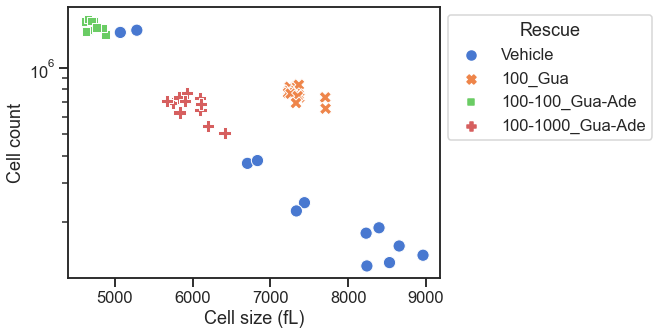

In [22]:
fig, ax1 = plt.subplots(1, 1, figsize=(9.5, 5))

g1 = sns.scatterplot(ax=ax1, x="Size", y="Count", hue="Rescue", style="Rescue", data=df, s=150)

g1.set_ylabel('Cell count')
g1.set_xlabel('Cell size (fL)')
g1.set_yscale("log")
#g1.set_xscale("log")
sns.move_legend(g1, "upper left", bbox_to_anchor=(1, 1))


fig.tight_layout()
fig.savefig('Cell_count-size.pdf', bbox_inches='tight')